In [1]:
%run pylib/setup
show("""# Spectra: compare UW with 4FGL""")
show_date()
df = load_data('files/fermi_sources_v2.csv'); 
fgl, uw = load_cats()

unid_data_file ='files/unid_table.csv' 
unid = pd.read_csv(unid_data_file, index_col=0)

# Spectra: compare UW with 4FGL

<h5 style="text-align:right; margin-right:15px"> 2023-06-08 15:47</h5>

Read 6699 source entries from `files/fermi_sources_v2.csv`, selected 6080 with criteria 'delta<0.2 & curvature<0.7'

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f070d9c8700>

### Pulsar-identified unids
Sorted by ascending eflux

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f070d906dc0>
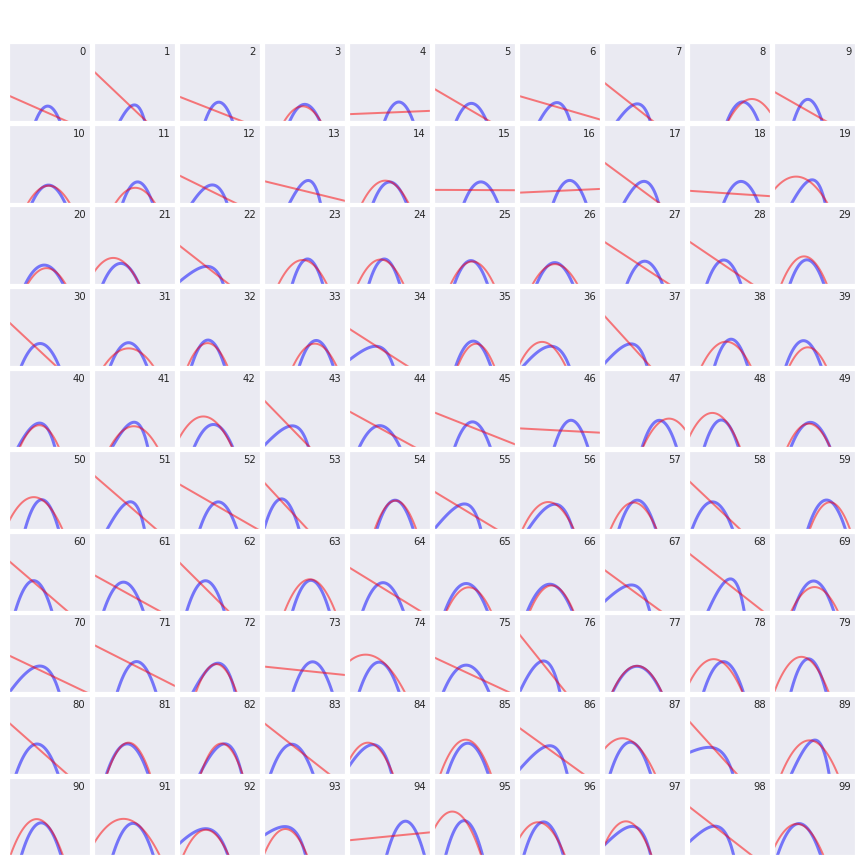

In [6]:
show(f"""### Pulsar-identified unids
Sorted by ascending eflux""")
unid_psr = unid.query('category=="X" | category=="psr-like"')
show(
    plot_seds(
        unid_psr.sort_values('log_eflux'),
        n=20,
        tooltips=np.arange(100),
        caption=plot_seds.__doc__
    )
)

In [3]:
dfq = unid_psr.sort_values('log_eflux')
specfunc = uw.loc[dfq.uw_name].specfunc

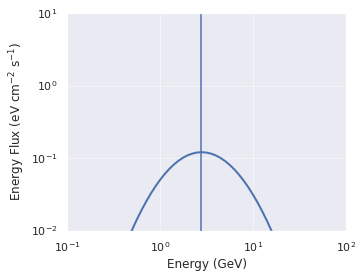

In [4]:
sf = specfunc[0]
p= sf.pars; p, sf.e0
sf.sed_plot(ylim=(1e-2,10))
plt.gca().axvline(sf.e0/1e3);

<AxesSubplot:xlabel='abs_sin_b', ylabel='Count'>

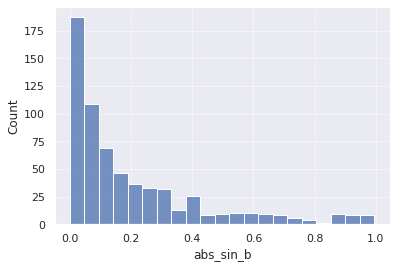

In [5]:
sns.histplot(unid_psr, x='abs_sin_b', bins=21,)

In [6]:
unid_psr.describe()

,log_nbb,pindex,curvature,log_e0,abs_sin_b,log_eflux,ts,r95,glat,ra,dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,0.140495,2.082214,0.530060,3.265810,0.203142,-11.510598,135.150025,0.105696,-0.685056,220.162697,-16.722832
std,0.219365,0.524056,0.141545,0.187883,0.232861,0.370435,306.595026,0.064453,20.484224,83.812152,37.142846
min,0.000000,1.000000,0.264504,2.742140,0.000002,-12.426501,25.017374,0.015424,-84.262596,0.149029,-80.383307
25%,0.000000,1.720898,0.422295,3.151523,0.038923,-11.764152,43.113043,0.063682,-6.573811,167.232600,-45.538222
50%,0.000000,2.249256,0.506140,3.258783,0.105825,-11.491937,67.443895,0.091813,-0.104820,253.688771,-27.284016
75%,0.301030,2.475600,0.624785,3.380329,0.284546,-11.261295,120.207734,0.130497,5.443761,276.206204,8.928248
max,1.176091,3.000000,0.883124,4.101586,0.994991,-10.061598,4523.990945,0.844795,83.777556,359.674225,84.283540


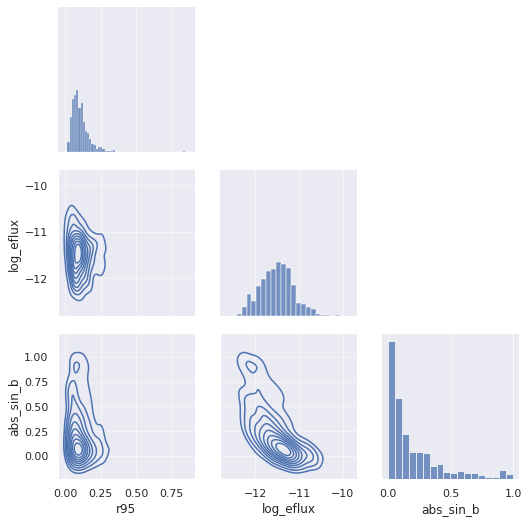

In [7]:
(sns.PairGrid(unid_psr, vars='r95 log_eflux abs_sin_b'.split(), corner=True)
  .map_lower(sns.kdeplot, )
  .map_diag(sns.histplot, )
);

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fec08f61040>
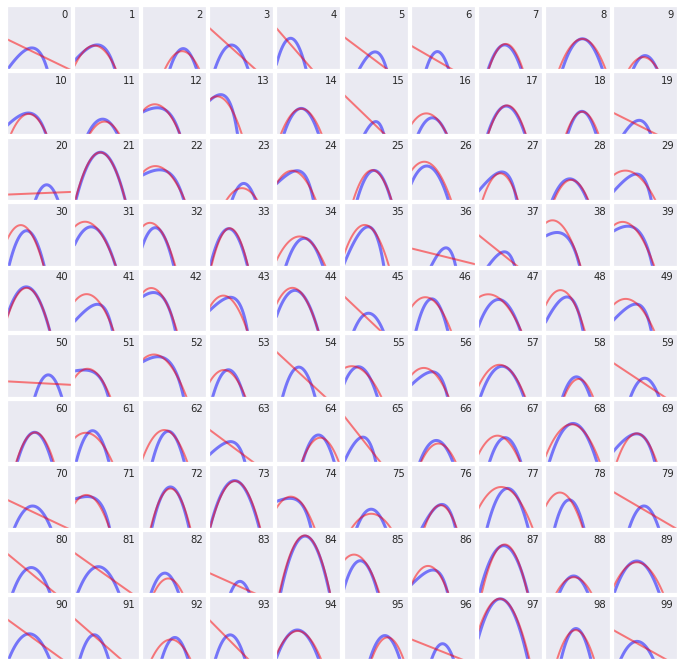

In [8]:
show(plot_seds(unid_psr.query('abs_sin_b>0.1')))

In [ ]:
show(f"""### Pulsar-identified unids fit with PLEX
Sorted by ascending eflux""")
show(plot_seds(unid.query('category=="psr-like"').sort_values('log_eflux')),caption=plot_seds.__doc__)

### Pulsar-identified unids fit with PLEX
Sorted by ascending eflux

In [ ]:
show(f"""### 4FGL-DR4 Pulsar SEDS
Sorted by ascending eflux""")
show(plot_seds(df.query("category=='psr'").sort_values('log_eflux')),caption=plot_seds.__doc__)

In [ ]:
show(f"""### 4FGL-DR4 FSRQ SEDS
Sorted by ascending eflux""")
show(plot_seds(df.query("category=='fsrq'").sort_values('log_eflux')),caption=plot_seds.__doc__)

In [ ]:
show(f"""### 4FGL-DR4 BL Lac SEDS
Sorted by ascending eflux""")
show(plot_seds(df.query("category=='bll'").sort_values('log_eflux')),caption=plot_seds.__doc__)